In [1]:
import pandas as pd
import numpy as np
import numpy.matlib as nm
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances


# Read data. Data from: https://doi.org/10.1016/j.matt.2021.01.008
data_folder = './Data/Images/'
aging_tests = ['20190606', '20190614', '20190622', '20190711', '20190723', '20190809']
n_timepoints = 1200 # First n timepoints will be analyzed. For this dataset, this is the first appr. 6000 min of the aging test.
data_type_to_fetch = '-R1-JT/BMP/RGB/Calibrated/'
file_begin = 'sample_'
file_end = '_cal.csv'
colors = ['r', 'g', 'b']
materials = ['CsPbI', 'FAPbI', 'MAPbI']
sample_filename = 'Samples.csv'


df_raw_data = [[] for j in range(len(aging_tests))]
df_stacked_colors = []
sample_df = []

for i in range(len(aging_tests)):
    
    for j in range(len(colors)):
        
        file = data_folder + aging_tests[i] + data_type_to_fetch + file_begin + colors[j] + file_end
        df_raw_data[i].append(pd.read_csv(file, header = None))
        df_raw_data[i][j] = df_raw_data[i][j].iloc[:,0:n_timepoints]
        
    # Stack all colors one after each other for each sample.
    df_stacked_colors.append(np.hstack(df_raw_data[i]))
    
    sample_file = data_folder + aging_tests[i] + data_type_to_fetch + sample_filename
    sample_df.append(pd.read_csv(sample_file))
    print('Number of samples and aging tests: ', sample_df[i].shape)
    print('Samples consist of: ', sample_df[i].loc[:, materials])
    
    # Drop samples that were discarded from the analysis (e.g. due to bad quality film).
    idx_to_be_dropped = sample_df[i][(sample_df[i] == 'Discarded').values].index
    print('These indices contain discarded samples and are dropped from the analysis: ', list(idx_to_be_dropped))
    sample_df[i].drop(index = idx_to_be_dropped, inplace = True)
    df_stacked_colors[i] = np.delete(df_stacked_colors[i], obj = idx_to_be_dropped, axis = 0)
    
    print('Shape after colors stacked: ', df_stacked_colors[i].shape)
        
    if i == 0:
        compositions = sample_df[i].loc[:, materials] # Contains only the compositions, for clustering.
        sample_df_all = sample_df[i] # Contains all the sample data, for investigating samples.
    if i > 0:
        compositions = compositions.append(sample_df[i].loc[:, materials], ignore_index = True)
        sample_df_all = sample_df_all.append(sample_df[i], ignore_index = True)
    
# Stack all samples.
data = np.vstack(df_stacked_colors)
print('Final shape: (n_samples, n_timepoints_and_colors) ', data.shape)


Number of samples and aging tests:  (28, 6)
Samples consist of:      CsPbI  FAPbI  MAPbI
0    0.75   0.00   0.25
1    0.00   1.00   0.00
2    0.50   0.00   0.50
3    1.00   0.00   0.00
4    0.50   0.50   0.00
5    0.00   1.00   0.00
6    0.50   0.00   0.50
7    1.00   0.00   0.00
8    0.00   0.75   0.25
9    0.00   0.75   0.25
10   0.25   0.75   0.00
11   0.75   0.25   0.00
12   0.00   0.50   0.50
13   0.00   0.50   0.50
14   0.25   0.50   0.25
15   0.75   0.00   0.25
16   0.00   0.25   0.75
17   0.00   0.25   0.75
18   0.25   0.25   0.50
19   0.50   0.50   0.00
20   0.25   0.50   0.25
21   0.00   0.00   1.00
22   0.25   0.00   0.75
23   0.50   0.25   0.25
24   0.25   0.25   0.50
25   0.00   0.00   1.00
26   0.75   0.25   0.00
27   0.50   0.25   0.25
These indices contain discarded samples and are dropped from the analysis:  []
Shape after colors stacked:  (28, 3600)
Number of samples and aging tests:  (28, 7)
Samples consist of:      CsPbI  FAPbI  MAPbI
0    0.98   0.00   0.02
1    0.

/tmp/ipykernel_71791/1657427332.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compositions = compositions.append(sample_df[i].loc[:, materials], ignore_index = True)
/tmp/ipykernel_71791/1657427332.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df_all = sample_df_all.append(sample_df[i], ignore_index = True)
/tmp/ipykernel_71791/1657427332.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compositions = compositions.append(sample_df[i].loc[:, materials], ignore_index = True)
/tmp/ipykernel_71791/1657427332.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df_all = sample_df_all.append(sample_df[i], ignor

Number of samples and aging tests:  (28, 6)
Samples consist of:      CsPbI  FAPbI  MAPbI
0    0.39   0.61   0.00
1    0.89   0.00   0.11
2    0.63   0.37   0.00
3    0.91   0.01   0.08
4    0.35   0.65   0.00
5    0.88   0.00   0.12
6    0.37   0.63   0.00
7    0.89   0.00   0.11
8    0.34   0.54   0.12
9    0.84   0.00   0.16
10   0.35   0.65   0.00
11   0.87   0.12   0.01
12   0.30   0.69   0.01
13   0.83   0.00   0.17
14   0.34   0.64   0.02
15   0.84   0.00   0.16
16   0.28   0.65   0.07
17   0.81   0.00   0.19
18   0.30   0.69   0.01
19   0.83   0.03   0.14
20   0.16   0.84   0.00
21   0.80   0.11   0.09
22   0.23   0.66   0.11
23   0.81   0.00   0.19
24   0.13   0.85   0.02
25   0.63   0.37   0.00
26   0.16   0.84   0.00
27   0.78   0.09   0.13
These indices contain discarded samples and are dropped from the analysis:  []
Shape after colors stacked:  (28, 3600)
Number of samples and aging tests:  (28, 6)
Samples consist of:      CsPbI  FAPbI  MAPbI
0    0.23   0.77   0.00
1    0.

/tmp/ipykernel_71791/1657427332.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compositions = compositions.append(sample_df[i].loc[:, materials], ignore_index = True)
/tmp/ipykernel_71791/1657427332.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df_all = sample_df_all.append(sample_df[i], ignore_index = True)
/tmp/ipykernel_71791/1657427332.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compositions = compositions.append(sample_df[i].loc[:, materials], ignore_index = True)
/tmp/ipykernel_71791/1657427332.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df_all = sample_df_all.append(sample_df[i], ignor

Number of samples and aging tests:  (28, 6)
Samples consist of:      CsPbI  FAPbI  MAPbI
0    0.22   0.72   0.06
1    0.69   0.31   0.00
2    0.25   0.75   0.00
3    0.76   0.24   0.00
4    0.18   0.82   0.00
5    0.44   0.55   0.01
6    0.20   0.69   0.11
7    0.59   0.41   0.00
8    0.16   0.70   0.14
9    0.38   0.62   0.00
10   0.18   0.78   0.04
11   0.53   0.47   0.00
12   0.13   0.87   0.00
13   0.31   0.36   0.33
14   0.16   0.75   0.09
15   0.32   0.67   0.01
16   0.12   0.77   0.11
17   0.30   0.39   0.32
18   0.12   0.81   0.07
19   0.31   0.30   0.39
20   0.34   0.66   0.00
21   0.27   0.72   0.01
22   0.10   0.89   0.01
23   0.28   0.37   0.35
24   0.20   0.80   0.00
25   0.24   0.37   0.39
26   0.09   0.85   0.06
27   0.27   0.34   0.40
These indices contain discarded samples and are dropped from the analysis:  []
Shape after colors stacked:  (28, 3600)
Number of samples and aging tests:  (28, 6)
Samples consist of:      CsPbI  FAPbI  MAPbI
0    0.00   0.00   1.00
1    0.

/tmp/ipykernel_71791/1657427332.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compositions = compositions.append(sample_df[i].loc[:, materials], ignore_index = True)
/tmp/ipykernel_71791/1657427332.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df_all = sample_df_all.append(sample_df[i], ignore_index = True)


In [2]:
%matplotlib notebook

In [3]:
# Tetragonal coordinates for the plots.
xy = nm.zeros((compositions.shape[0],2))
xy[:,1] = compositions.iloc[:,[2]]*0.8660
xy[:,0] = nm.add(compositions.iloc[:,[0]], compositions.iloc[:,[2]]*0.5)


/tmp/ipykernel_71791/4126379496.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  xy[:,0] = nm.add(compositions.iloc[:,[0]], compositions.iloc[:,[2]]*0.5)


<IPython.core.display.Javascript object>


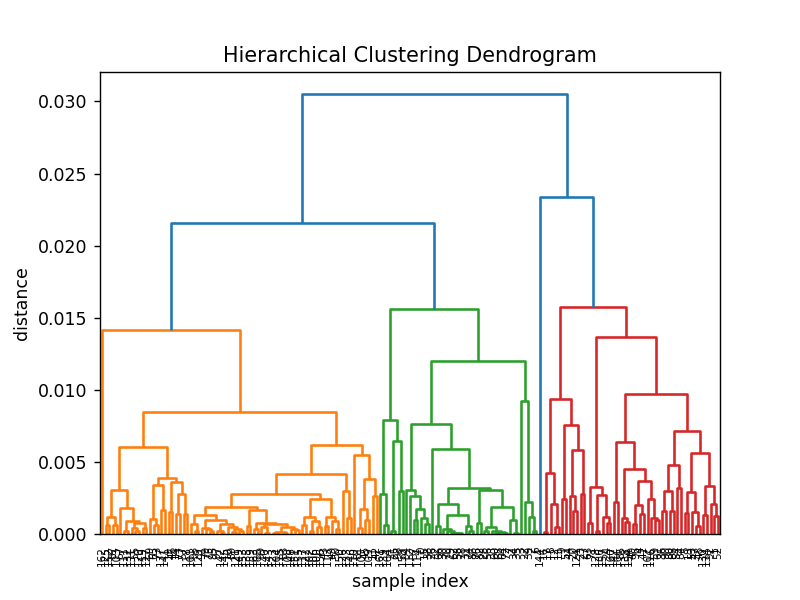

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [70.0, 70.0, 106.25, 106.25],
  [55.0, 55.0, 88.125, 88.125],
  [30.0, 30.0, 71.5625, 71.5625],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [142.5, 142.5, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [190.0, 190.0, 220.0, 220.0],
  [156.25, 156.25, 205.0, 205.0],
  [50.78125, 50.78125, 180.625, 180.625],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [355.0, 355.0, 365.0, 365.0],
  [375.0, 375.0, 385.0, 385.0],
  [360

In [4]:
#%% Hierarchical Cluster Analysis
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette, centroid

# compute dissimilarity measure using cosine metric
# and create linkages for dendrogram
# linkages describe the merge points of the dendrogram.
Z = linkage(data, 'average', metric = 'cosine')

# plot dendrogram
plt.figure()
plt.clf()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

# rotates the x axis labels
dendrogram(Z, leaf_rotation=90., leaf_font_size=6.)

[0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 2 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1]


<IPython.core.display.Javascript object>


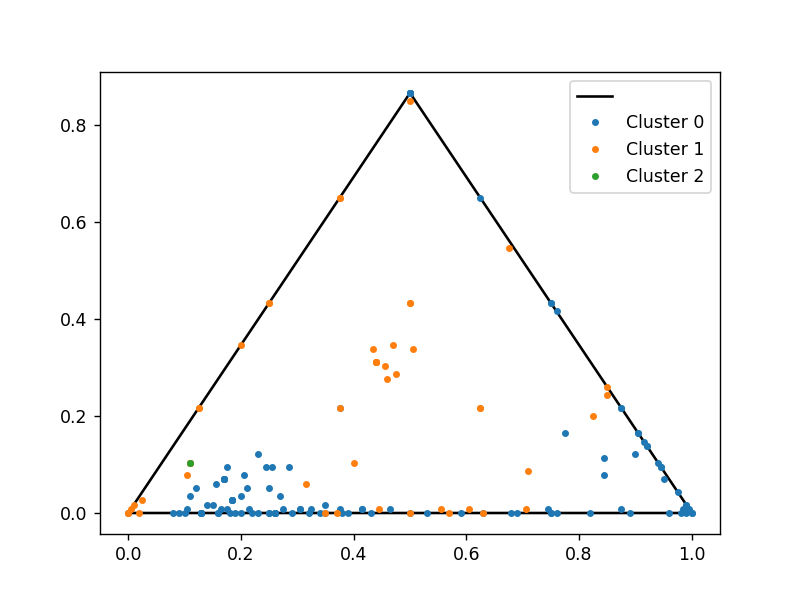

(array([144]),)
     Unnamed: 0 Comments                                   Sample  CsPbI  \
144           5  With Br  #5-C2-G3-CsPbI0.05 FAPbI0.83 MAPbI0.12    0.05   

     FAPbI  MAPbI Unnamed: 6  
144   0.83   0.12        NaN  
     Unnamed: 0 Comments                                    Sample  CsPbI  \
141           2  With Br   #2-B1-G2-CsPbI0.05 FAPbI0.83 MAPbI0.12    0.05   
144           5  With Br   #5-C2-G3-CsPbI0.05 FAPbI0.83 MAPbI0.12    0.05   
147           8  With Br   #8-D3-G4-CsPbI0.05 FAPbI0.83 MAPbI0.12    0.05   
166          27  With Br  #27-A7-G1-CsPbI0.05 FAPbI0.83 MAPbI0.12    0.05   

     FAPbI  MAPbI Unnamed: 6  
141   0.83   0.12        NaN  
144   0.83   0.12        NaN  
147   0.83   0.12        NaN  
166   0.83   0.12        NaN  


<IPython.core.display.Javascript object>


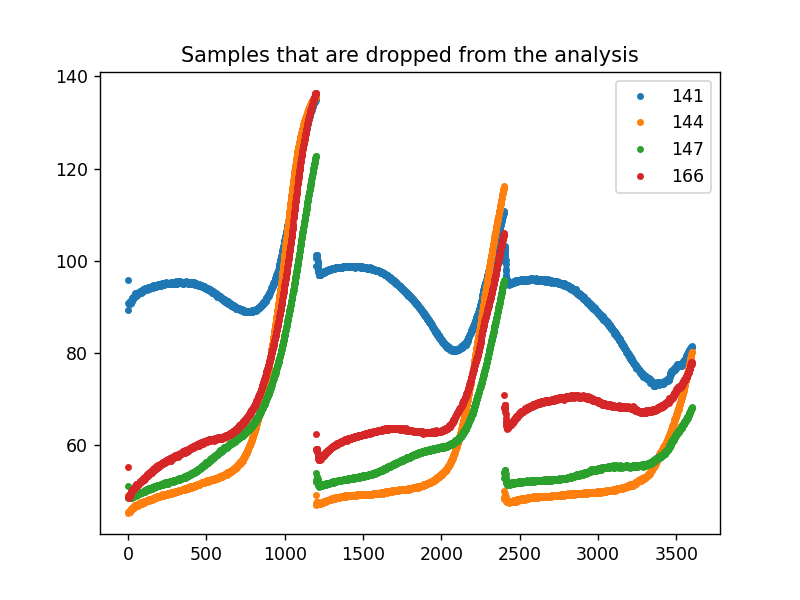

In [5]:
#%%
# identify HCA labels for k clusters
k = 3
L = fcluster(Z, k, criterion='maxclust')
L = L - 1
print(L)

# Colors in the plots.
cluster_colors = np.array(['tab:blue', 'tab:orange', 'tab:green', 'tab:brown', 'tab:pink'])

plt.figure()
plt.plot([0,1,.5,0],[0,0,nm.sqrt(.75),0], 'k')
legend_content = ['']
for i in range(k):
    plt.plot(xy[L==i,0],xy[L==i,1], '.', c = cluster_colors[i])
    #plt.plot(xy[cluster_rep[i],0],xy[cluster_rep[i],1], 's', c = cluster_colors[i])
    legend_content.extend(['Cluster ' + str(i)])#, 'Cluster center ' + str(i)])
plt.legend(legend_content)
plt.show()

print(np.where(L==2))
print(sample_df_all.iloc[np.where(L==2)[0], :])

# The above sample (145) always clusters to its own and turns out it is one of the reference samples
# containing Br, unlike the other samples. Let's treat this composition as an outlier. Lets plot them, drop
# them and identify HCA labels for k clusters again.


to_be_dropped = np.where(sample_df_all == 'With Br')[0]
print(sample_df_all.iloc[to_be_dropped, :])

plt.figure()
plt.plot(data[to_be_dropped, :].T, '.')
plt.legend(to_be_dropped)
plt.title('Samples that are dropped from the analysis')
plt.show()

cleaned_data = np.delete(data, to_be_dropped, axis=0)
xy_cleaned = np.delete(xy, to_be_dropped, axis=0)
#print(sample_df_all.index)
sample_df_cleaned = sample_df_all.copy().drop(index=to_be_dropped).reset_index(drop = True)
#print(sample_df_cleaned.index)
compositions_cleaned = compositions.copy().drop(index=to_be_dropped).reset_index(drop = True)

<IPython.core.display.Javascript object>


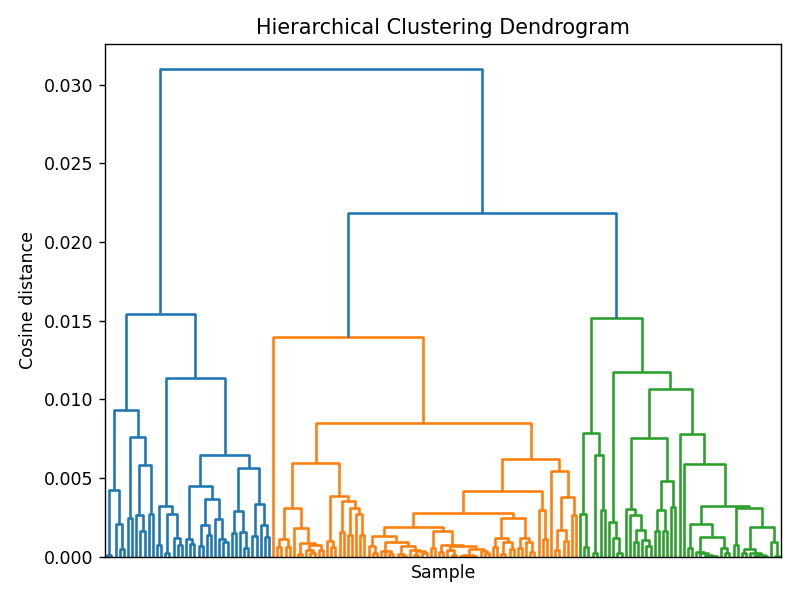

[2 0 2 2 0 0 2 2 0 0 1 1 0 0 1 2 0 0 0 1 0 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 1 1 0 1 1 0 0 1 1 0 0 0 2 1 2 1 2 0 2 0 2 0 2 1 2 1 2 1 2 0 2 1
 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 0 1 2 1 0 1 2 1 1 1 1 1 1 1 1 0 1 1 1
 1 2 1 2 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 2 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 2 1 0 2 1 1 2 1]


<IPython.core.display.Javascript object>


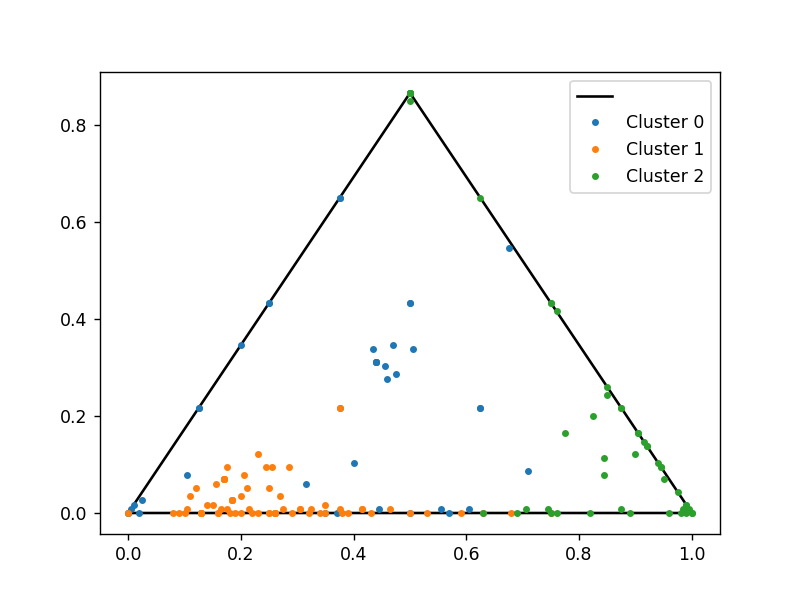

(13203,)
[[8.30000000e+01 1.23000000e+02 6.81973354e+01 2.00000000e+00]
 [1.11000000e+02 1.32000000e+02 6.83502026e+01 2.00000000e+00]
 [6.80000000e+01 7.20000000e+01 8.07289226e+01 2.00000000e+00]
 [1.15000000e+02 1.42000000e+02 9.16148555e+01 2.00000000e+00]
 [7.50000000e+01 9.50000000e+01 9.57578540e+01 2.00000000e+00]
 [1.19000000e+02 1.27000000e+02 9.83867784e+01 2.00000000e+00]
 [1.04000000e+02 1.63000000e+02 9.95361885e+01 3.00000000e+00]
 [9.90000000e+01 1.69000000e+02 9.73653012e+01 4.00000000e+00]
 [1.48000000e+02 1.52000000e+02 1.03171213e+02 2.00000000e+00]
 [5.80000000e+01 7.80000000e+01 1.06837227e+02 2.00000000e+00]
 [2.90000000e+01 5.60000000e+01 1.13580756e+02 2.00000000e+00]
 [7.90000000e+01 9.10000000e+01 1.13709015e+02 2.00000000e+00]
 [1.28000000e+02 1.36000000e+02 1.14790696e+02 2.00000000e+00]
 [6.00000000e+01 1.65000000e+02 1.17191442e+02 3.00000000e+00]
 [1.08000000e+02 1.35000000e+02 1.18379271e+02 2.00000000e+00]
 [1.40000000e+02 1.66000000e+02 1.23637752e+02

<IPython.core.display.Javascript object>


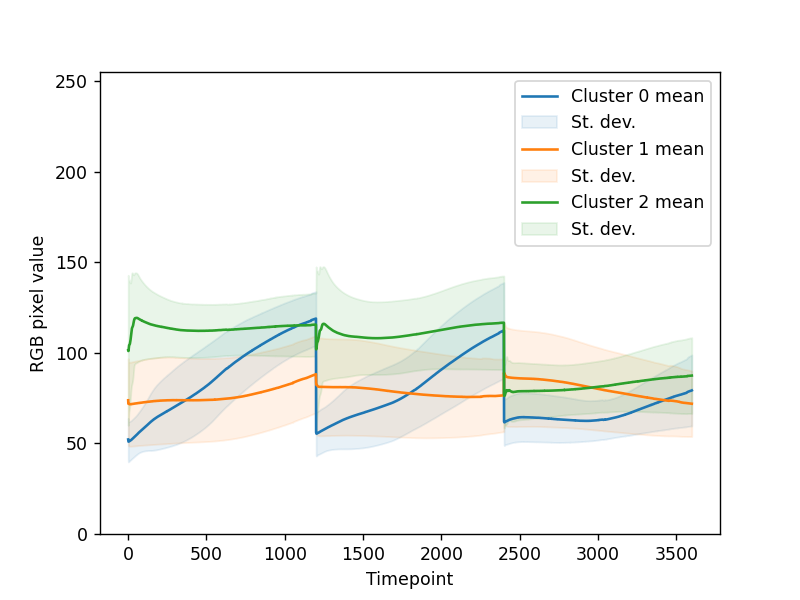

In [6]:
# Let's repeat hierarchical clustering with cleaned data.

# compute dissimilarity measure using cosine metric
# and create linkages for dendrogram
# linkages describe the merge points of the dendrogram.
Z = linkage(cleaned_data, 'average', metric = 'cosine')


set_link_color_palette(list(cluster_colors))

# plot dendrogram
plt.figure()
plt.clf()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Cosine distance')

# rotates the x axis labels
R = dendrogram(Z, leaf_rotation=90., leaf_font_size=6., no_labels = True)

k = 3
L = fcluster(Z, k, criterion='maxclust')
L = L - 1
print(L)


#fig = plt.gcf()
#fig.set_size_inches(4.5, 3.5)
plt.tight_layout()

plt.savefig('clustering_hier_dendr.png')
plt.savefig('clustering_hier_dendr.pdf')


plt.figure()
plt.plot([0,1,.5,0],[0,0,nm.sqrt(.75),0], 'k')
legend_content = ['']
for i in range(k):
    plt.plot(xy_cleaned[L==i,0],xy_cleaned[L==i,1], '.', c = cluster_colors[i])
    #plt.plot(xy[cluster_rep[i],0],xy[cluster_rep[i],1], 's', c = cluster_colors[i])
    legend_content.extend(['Cluster ' + str(i)])#, 'Cluster center ' + str(i)])
plt.legend(legend_content)

plt.show()

from scipy.spatial.distance import pdist
mytest = pdist(cleaned_data)
print(mytest.shape)
print(centroid(mytest))
print(L.shape)
print(cleaned_data.shape)

plt.figure()
legend_content = []
mean = []
for i in range(k):
    mean.extend([np.average(cleaned_data[L==i,:], axis=0)])
    std = np.std(cleaned_data[L==i,:], axis=0)
    n_points = mean[i].shape[0]
    plt.plot(mean[i], '-', c = cluster_colors[i])
    plt.fill_between(range(n_points), mean[i] - std, mean[i] + std, color = cluster_colors[i], alpha=0.1)
    #plt.plot(xy[cluster_rep[i],0],xy[cluster_rep[i],1], 's', c = cluster_colors[i])
    legend_content.extend(['Cluster ' + str(i) + ' mean', 'St. dev.'])#, 'Cluster center ' + str(i)])
plt.legend(legend_content)
plt.ylim((0,255))
plt.xlabel('Timepoint')
plt.ylabel('RGB pixel value')
plt.show()



(1, 3600)
(163, 3600)
[[0.         0.01276319 0.00187937 ... 0.0259276  0.01525439 0.02853281]
 [0.01276319 0.         0.00738259 ... 0.00720613 0.01498052 0.00976118]
 [0.00187937 0.00738259 0.         ... 0.01785503 0.01193836 0.02057728]
 ...
 [0.0259276  0.00720613 0.01785503 ... 0.         0.03081664 0.00032406]
 [0.01525439 0.01498052 0.01193836 ... 0.03081664 0.         0.03481446]
 [0.02853281 0.00976118 0.02057728 ... 0.00032406 0.03481446 0.        ]]
Minimum distance in cluster  0 :  0.0008002525028080187 , maximum distance:  0.09901058778527316
index of minimum distance sample:  92
Details of the min. distance sample:
 Unnamed: 0                                         9
Comments                          Batch: 20190711-JT
Sample        #9-C3-17-CsPbI0.66 FAPbI0.24 MAPbI0.1 
CsPbI                                           0.66
FAPbI                                           0.24
MAPbI                                            0.1
Unnamed: 6                                 

<IPython.core.display.Javascript object>


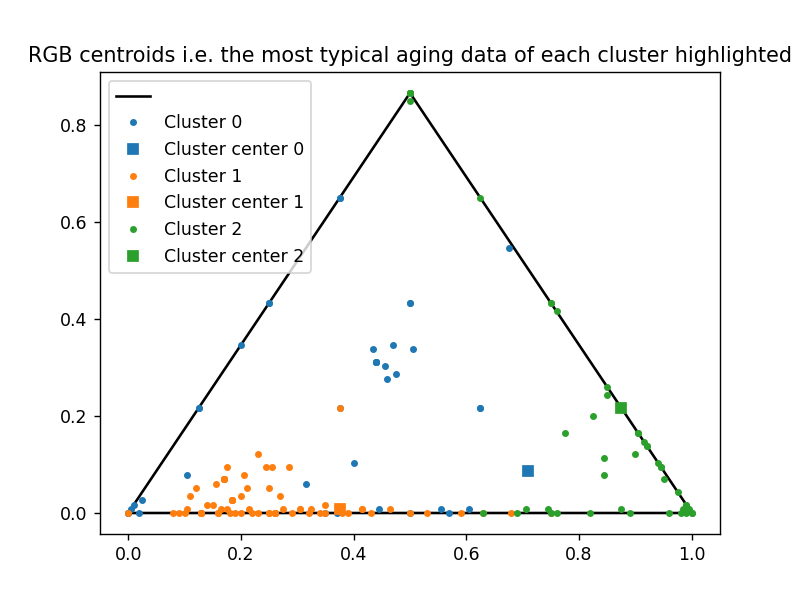

In [7]:
# Pick the nearest sample to the cluster center (i.e. arithmetic mean of all the samples in the cluster,
# by their RGB data), "the most typical sample".

print(np.reshape(mean[0], (1,mean[0].shape[0])).shape)
print(cleaned_data.shape)
cluster_rep = []
for i in range(k):
    d = pairwise_distances(nm.concatenate((np.reshape(mean[i], (1,mean[i].shape[0])), cleaned_data), axis=0), metric = 'cosine')

    print(d)
    
    cluster_rep.append(nm.argmin(d[0,1:],axis = 0))
    
    print('Minimum distance in cluster ', i, ': ', np.min(d[0,1:]), ', maximum distance: ', np.max(d))
    print('index of minimum distance sample: ', cluster_rep[i])
    print('Details of the min. distance sample:\n', sample_df_cleaned.iloc[cluster_rep[i],:], '\n')

    
plt.figure()
plt.plot([0,1,.5,0],[0,0,nm.sqrt(.75),0], 'k')
legend_content = ['']
for i in range(k):
    plt.plot(xy_cleaned[L==i,0],xy_cleaned[L==i,1], '.', c = cluster_colors[i])
    plt.plot(xy_cleaned[cluster_rep[i],0],xy_cleaned[cluster_rep[i],1], 's', c = cluster_colors[i])
    legend_content.extend(['Cluster ' + str(i), 'Cluster center ' + str(i)])
plt.legend(legend_content)
plt.title('RGB centroids i.e. the most typical aging data of each cluster highlighted')
plt.show()




<IPython.core.display.Javascript object>


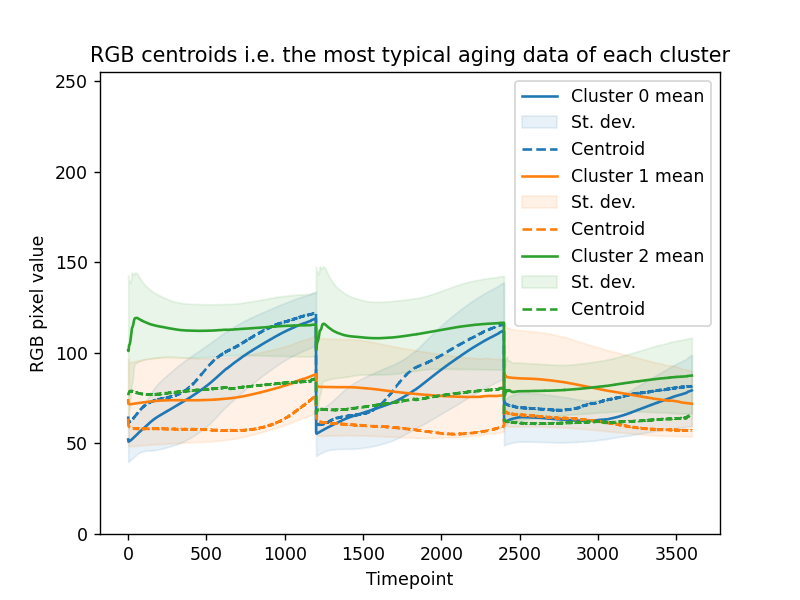

In [8]:
# RGB centroids plotted

plt.figure()
legend_content = []
mean = []
for i in range(k):
    mean.extend([np.average(cleaned_data[L==i,:], axis=0)])
    std = np.std(cleaned_data[L==i,:], axis=0)
    n_points = mean[i].shape[0]
    plt.plot(mean[i], '-', c = cluster_colors[i])
    plt.fill_between(range(n_points), mean[i] - std, mean[i] + std, color = cluster_colors[i], alpha=0.1)
    plt.plot(cleaned_data[cluster_rep[i],:],'--', c = cluster_colors[i])
    #plt.plot(xy[cluster_rep[i],0],xy[cluster_rep[i],1], 's', c = cluster_colors[i])
    legend_content.extend(['Cluster ' + str(i) + ' mean', 'St. dev.', 'Centroid'])#, 'Cluster center ' + str(i)])
plt.legend(legend_content)
plt.ylim((0,255))
plt.xlabel('Timepoint')
plt.ylabel('RGB pixel value')
plt.title('RGB centroids i.e. the most typical aging data of each cluster')
plt.show()

Minimum distance in cluster  0 :  0.0003283157079964072 , maximum distance:  1.0
index of minimum distance sample:  14
Details of the min. distance sample:
 Unnamed: 0                                         14
Comments                                            -
Sample        #14-B4-15-CsPbI0.25 FAPbI0.5 MAPbI0.25 
CsPbI                                            0.25
FAPbI                                             0.5
MAPbI                                            0.25
Unnamed: 6                                        NaN
Name: 14, dtype: object 

Minimum distance in cluster  1 :  0.0001933703349584759 , maximum distance:  1.0
index of minimum distance sample:  108
Details of the min. distance sample:
 Unnamed: 0                                          25
Comments                            Batch: 20190711-JT
Sample        #25-C7-21-CsPbI0.25 FAPbI0.71 MAPbI0.04 
CsPbI                                             0.25
FAPbI                                             0.71
MAPbI 

<IPython.core.display.Javascript object>


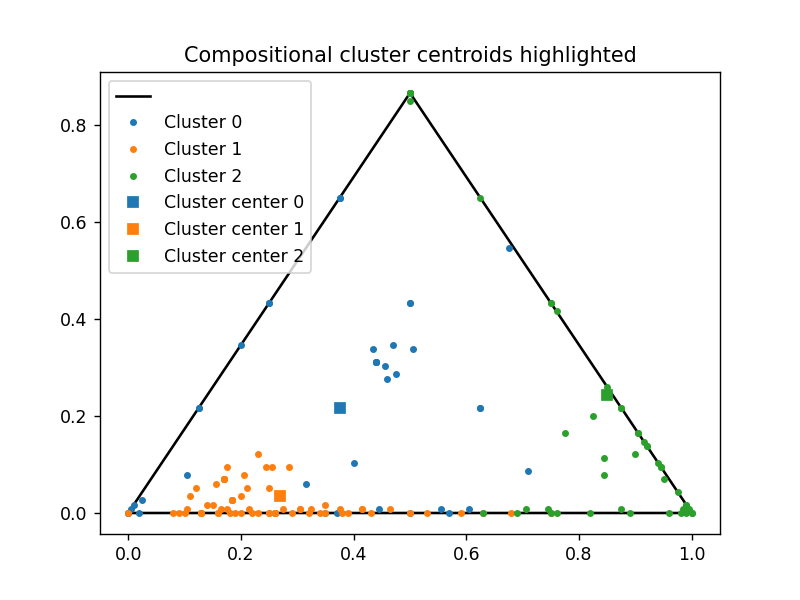

In [9]:
# Let's take also compositional center.


cluster_rep_comp = []
mean_comp = []

for i in range(k):
    
    mean_comp.extend([np.average(compositions_cleaned.iloc[L==i,0:3], axis=0)])
    
    vector = nm.concatenate((np.reshape(mean_comp[i], (1,mean_comp[i].shape[0])),
                                           compositions_cleaned.iloc[:,0:3]), axis=0)
    
    d = pairwise_distances(vector, metric = 'cosine')

    comp = nm.argmin(d[0,1:],axis = 0)
    
    cluster_rep_comp.append(comp)
    
    print('Minimum distance in cluster ', i, ': ', np.min(d[0,1:]), ', maximum distance: ', np.max(d))
    print('index of minimum distance sample: ', cluster_rep_comp[i])
    print('Details of the min. distance sample:\n', sample_df_cleaned.iloc[cluster_rep_comp[i],:], '\n')

    
plt.figure()
plt.plot([0,1,.5,0],[0,0,nm.sqrt(.75),0], 'k')
legend_content = ['']
for i in range(k):
    plt.plot(xy_cleaned[L==i,0],xy_cleaned[L==i,1], '.', c = cluster_colors[i])
    legend_content.extend(['Cluster ' + str(i)])
for i in range(k):
    plt.plot(xy_cleaned[cluster_rep_comp[i],0],xy_cleaned[cluster_rep_comp[i],1], 's', c = cluster_colors[i])
    legend_content.extend(['Cluster center ' + str(i)])
plt.legend(legend_content)
plt.title('Compositional cluster centroids highlighted')
plt.show()


<IPython.core.display.Javascript object>


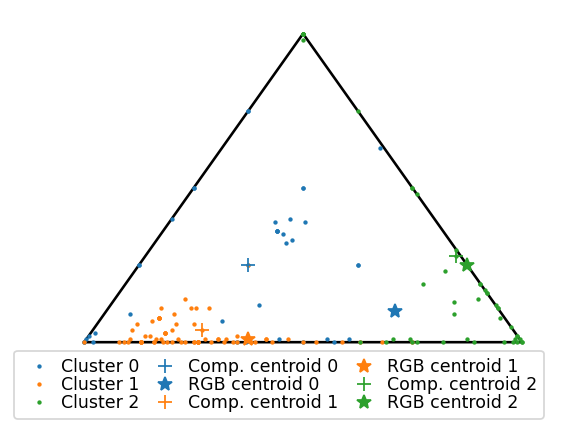

/tmp/ipykernel_71791/3159901567.py:16: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fe49778b910> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(legend_content, bbox_to_anchor=(-0.1, -0.18, 1.1, 1),


In [10]:
# Let's plot the samples with the most typical aging data within the cluster, 
# as well as the compositional centers into the same triangle.
  
plt.figure()
plt.plot([0,1,.5,0],[0,0,nm.sqrt(.75),0], 'k')
legend_content = ['_nolegend_']
for i in range(k):
    plt.plot(xy_cleaned[L==i,0],xy_cleaned[L==i,1], '.', c = cluster_colors[i], markersize=3)
    legend_content.extend(['Cluster ' + str(i)])
for i in range(k):
    plt.plot(xy_cleaned[cluster_rep_comp[i],0],xy_cleaned[cluster_rep_comp[i],1], '+', c = cluster_colors[i], markersize=8)
    legend_content.extend(['Comp. centroid ' + str(i)])
    plt.plot(xy_cleaned[cluster_rep[i],0],xy_cleaned[cluster_rep[i],1], '*', c = cluster_colors[i], markersize=8)
    legend_content.extend(['RGB centroid ' + str(i)])
plt.gca().axis('off')
plt.legend(legend_content, bbox_to_anchor=(-0.1, -0.18, 1.1, 1), 
           loc='lower left', ncol=3, borderaxespad=0,
           labelspacing=0, handletextpad=0.3, mode='expand')
fig = plt.gcf()
fig.set_size_inches(4.5, 3.5)
plt.tight_layout()


plt.savefig('clustering_hier.png')
plt.savefig('clustering_hier.svg')
plt.savefig('clustering_hier.pdf')

plt.show()

<IPython.core.display.Javascript object>


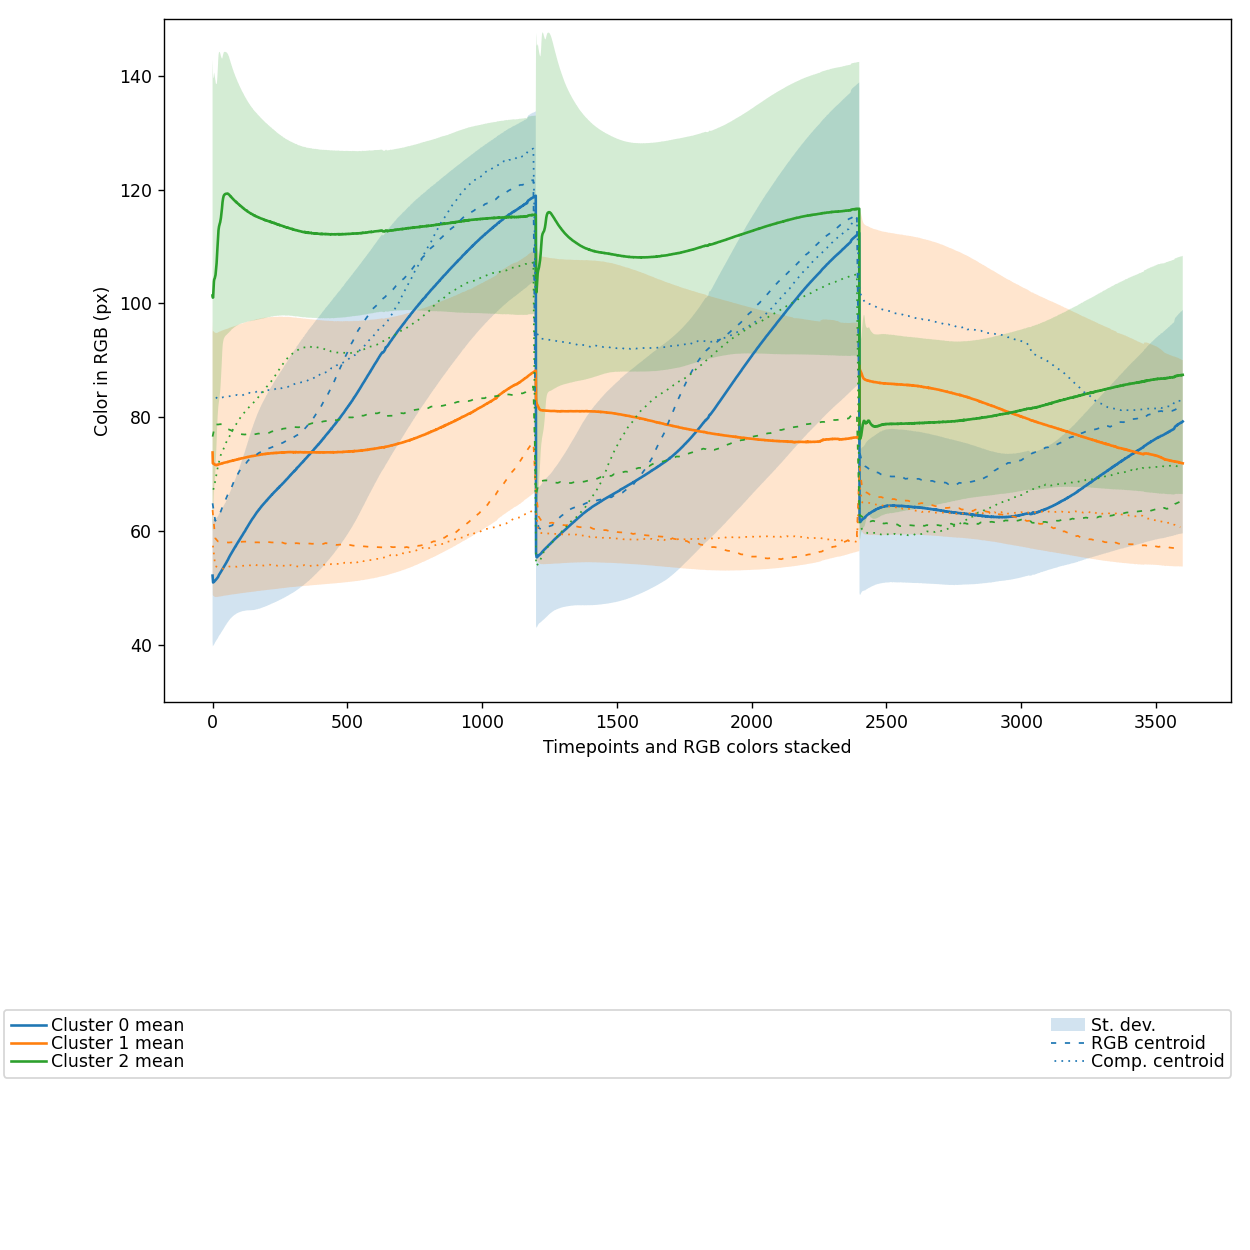

In [11]:
plt.figure()
legend_content = []
mean = []

for i in range(k):
    mean.extend([np.average(cleaned_data[L==i,:], axis=0)])
    plt.plot(mean[i], '-', c = cluster_colors[i])
    legend_content.extend(['Cluster ' + str(i) + ' mean'])#, 'St. dev.', 'RGB centroid', 'Comp. centroid'])#, 'Cluster center ' + str(i)])

for i in range(k):
    std = np.std(cleaned_data[L==i,:], axis=0)
    n_points = mean[i].shape[0]
    plt.fill_between(range(n_points), mean[i] - std, mean[i] + std, color = cluster_colors[i], alpha=0.2, edgecolor = None)
    plt.plot(range(0,len(cleaned_data[cluster_rep[i],:]),10),
                    cleaned_data[cluster_rep[i],::10],
                    linestyle=(0,(3,5)), c = cluster_colors[i], linewidth=1)
    plt.plot(range(0,len(cleaned_data[cluster_rep_comp[i],:]),10),
                    cleaned_data[cluster_rep_comp[i],::10],
                    linestyle=(2,(1,3)), c = cluster_colors[i], linewidth=1)
    if i == 0:
        legend_content.extend(['St. dev.', 'RGB centroid', 'Comp. centroid'])

plt.legend(legend_content, bbox_to_anchor=(-0.15, -0.55, 1.15, 1), 
           loc='lower left', ncol=2, borderaxespad=0,
           labelspacing=0, handletextpad=0.3, mode='expand')
plt.ylim((30,150))
plt.xlabel('Timepoints and RGB colors stacked')
plt.ylabel('Color in RGB (px)')

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.tight_layout()

plt.savefig('timeseries.png')
plt.savefig('timeseries.svg')
plt.savefig('timeseries.pdf')

plt.show()
